<a href="https://colab.research.google.com/github/mengwangk/trading-playground/blob/master/notebook/LSTM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM - Stock Analysis

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import io

In [0]:
# https://github.com/mwitiderrick/stockprice
# https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

In [3]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving GENTING_data_set.csv to GENTING_data_set.csv
Saving GENTING_train_set.csv to GENTING_train_set.csv
Saving GENTING_test_set.csv to GENTING_test_set.csv
{'GENTING_data_set.csv': b'"Date","Price","Open","High","Low","Vol.","Change %"\n"Jan 18, 2019","6.79","6.83","6.89","6.75","10.25M","-0.44%"\n"Jan 17, 2019","6.82","6.47","6.84","6.47","12.36M","6.23%"\n"Jan 16, 2019","6.42","6.48","6.50","6.38","6.92M","-0.47%"\n"Jan 15, 2019","6.45","6.39","6.48","6.38","4.39M","1.10%"\n"Jan 14, 2019","6.38","6.45","6.49","6.31","3.68M","-1.09%"\n"Jan 11, 2019","6.45","6.43","6.45","6.36","2.73M","0.78%"\n"Jan 10, 2019","6.40","6.47","6.48","6.25","4.06M","-0.16%"\n"Jan 09, 2019","6.41","6.34","6.44","6.25","5.76M","1.58%"\n"Jan 08, 2019","6.31","6.09","6.34","6.07","5.10M","4.13%"\n"Jan 07, 2019","6.06","5.95","6.08","5.95","4.65M","2.19%"\n"Jan 04, 2019","5.93","5.96","5.97","5.91","8.62M","-0.50%"\n"Jan 03, 2019","5.96","6.00","6.06","5.95","3.51M","-0.67%"\n"Jan 02, 2019","6.00","6.12","6.1

In [7]:
UOM = {'K': 1000, 'M': 1000000}

def convert_to_numeric(val):
    return float(val[:-1]) * UOM[val[-1]]

def clean_dataset(df):
    df.rename(columns={'Price':'Close', 'Vol.':'Volume'}, inplace=True)
    df.drop(columns=['Change %'], axis=1, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Volume'] = df['Volume'].apply(convert_to_numeric)
    df.sort_values(by=['Date'], ascending=True, inplace=True)
    #df.set_index('Date', inplace=True)

# dataset = pd.read_csv('data/GENTING_train_set.csv', parse_dates=True)
#print(uploaded)
dataset = pd.read_csv(io.StringIO(uploaded['GENTING_train_set.csv'].decode('utf-8')), parse_dates=True)
clean_dataset(dataset)
training_set = dataset.iloc[:, 1:2].values
dataset.head(10)

,Date,Close,Open,High,Low,Volume
1767,2011-08-15,10.14,10.10,10.16,10.08,6490000.0
1766,2011-08-16,10.10,10.18,10.24,10.02,3160000.0
1765,2011-08-17,10.04,10.10,10.10,10.02,5410000.0
1764,2011-08-18,9.98,10.14,10.14,9.97,5350000.0
1763,2011-08-19,9.70,9.85,9.85,9.65,11570000.0
1762,2011-08-22,9.51,9.68,9.69,9.49,8520000.0
1761,2011-08-23,9.70,9.55,9.70,9.40,6520000.0
1760,2011-08-24,9.52,9.80,9.80,9.52,5090000.0
1759,2011-08-25,9.78,9.55,9.78,9.54,6120000.0
1758,2011-08-26,9.46,9.73,9.73,9.43,4560000.0


In [8]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.76293103]
 [0.75431034]
 [0.74137931]
 ...
 [0.14008621]
 [0.125     ]
 [0.15948276]]


In [25]:
X_train = []
y_train = []
print(len(training_set_scaled))
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)
print(len(X_train))
print(len(y_train))

1768


IndexError: ignored

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [20]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
# regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
1708/1708 [==============================] - 14s 8ms/step - loss: 0.0773
Epoch 2/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0205
Epoch 3/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0161
Epoch 4/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0111
Epoch 5/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0097
Epoch 6/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0084
Epoch 7/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0078
Epoch 8/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0075
Epoch 9/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0079
Epoch 10/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0065
Epoch 11/100
1708/1708 [==============================] - 10s 6ms/step - loss: 0.0062
Epoch 12/100
1708/1708 [==============================] - 10s 6

In [21]:
dataset_test = pd.read_csv(io.StringIO(uploaded['GENTING_test_set.csv'].decode('utf-8')), parse_dates=True)
clean_dataset(dataset_test)
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_test.head(10)

,Date,Close,Open,High,Low,Volume
52,2018-11-01,7.40,7.34,7.43,7.24,1730000.0
51,2018-11-02,7.20,7.45,7.78,7.20,25910000.0
50,2018-11-05,6.74,6.53,6.96,6.35,36450000.0
49,2018-11-07,6.74,6.80,6.93,6.70,12300000.0
48,2018-11-08,6.76,6.85,6.85,6.73,14210000.0
47,2018-11-09,6.78,6.78,6.79,6.68,6690000.0
46,2018-11-12,6.72,6.77,6.80,6.72,5590000.0
45,2018-11-13,6.72,6.70,6.76,6.67,3790000.0
44,2018-11-14,6.73,6.74,6.76,6.71,4860000.0
43,2018-11-15,6.82,6.73,6.84,6.72,3090000.0


In [23]:
dataset_total = pd.concat((dataset['Open'], dataset_test['Open']), axis = 0)
dataset_total.head(10)

1767    10.10
1766    10.18
1765    10.10
1764    10.14
1763     9.85
1762     9.68
1761     9.55
1760     9.80
1759     9.55
1758     9.73
Name: Open, dtype: float64

In [28]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
print(len(dataset_test))
print(len(inputs))
print(inputs)

53
113
[8.74 8.7  8.7  8.71 8.7  8.74 8.82 8.73 8.69 8.67 8.61 8.59 8.61 8.68
 8.61 8.6  8.74 8.66 8.71 8.7  8.62 8.42 8.4  8.28 8.17 8.28 8.03 8.
 8.   7.99 8.   8.   8.   7.9  7.92 7.89 7.89 7.83 7.78 7.97 7.9  7.81
 7.8  7.8  7.84 7.23 7.16 7.23 7.2  7.3  7.29 7.29 7.45 7.49 7.42 7.35
 7.27 7.22 7.25 7.27 7.34 7.45 6.53 6.8  6.85 6.78 6.77 6.7  6.74 6.73
 6.87 7.   6.9  6.85 6.89 6.89 6.4  6.38 6.6  6.35 6.25 6.59 6.41 6.3
 6.28 6.25 6.04 5.96 6.05 6.02 6.04 6.   6.05 6.21 6.19 6.2  6.17 6.07
 6.1  6.12 6.12 6.   5.96 5.95 6.09 6.34 6.47 6.43 6.45 6.39 6.48 6.47
 6.83]


In [0]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(dataset_test) + 60):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

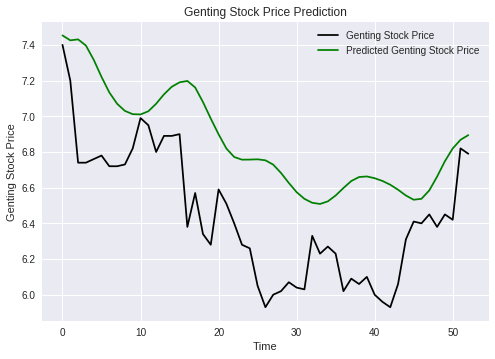

In [30]:
plt.plot(real_stock_price, color = 'black', label = 'Genting Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Genting Stock Price')
plt.title('Genting Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Genting Stock Price')
plt.legend()
plt.show()